# PROJECT 2: Linear Regression 


HONORE NGUESSAN

NOVEMBER 17, 2019

# INTRODUCTION


   In our project, we are assigned to do a linear regression using Scikitlearn to train, test and predict a numerical target variable. We are going to look at the US violent crime rates at the state level (20 states), from 1960 to 2014, with rates per 100,000 population for crime types such as murder, legacy rape,robbery, and aggravated assault, as reported by the Uniform Crime Report. There are 4 crime types in total. That dataset is from:https://ucrdatatool.gov/Search/Crime/State/StatebyState.cfm?NoVariables=Y. There are 1100 observations and 9 Variables.
   
   First of all, I'm interested in the relationship analysis between the US violent crime and legacy. Otherwise, I want to know whether the US violent crime have a weak or strong correlation with legacy.

# 1- Reading the Data

In [3]:
# Importing libraires
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd

In [4]:
# Read the .CVS file
df=pd.read_csv('CrimeStatebyState.csv')
print(df)
type(df)

       States  Year  Population  Violent Crime rate  \
0     Alabama  1960     3266740               186.6   
1     Alabama  1961     3302000               168.5   
2     Alabama  1962     3358000               157.3   
3     Alabama  1963     3347000               182.7   
4     Alabama  1964     3407000               213.1   
5     Alabama  1965     3462000               199.8   
6     Alabama  1966     3517000               230.3   
7     Alabama  1967     3540000               238.6   
8     Alabama  1968     3566000               232.4   
9     Alabama  1969     3531000               250.4   
10    Alabama  1970     3444165               295.7   
11    Alabama  1971     3479000               311.4   
12    Alabama  1972     3510000               313.2   
13    Alabama  1973     3539000               350.1   
14    Alabama  1974     3577000               372.9   
15    Alabama  1975     3614000               392.9   
16    Alabama  1976     3665000               388.8   
17    Alab

pandas.core.frame.DataFrame

# 2- Dimensions and Structure of the Original Dataset

In [5]:
df.dtypes

States                                        object
Year                                           int64
Population                                     int64
Violent Crime rate                           float64
Murder and nonnegligent manslaughter rate    float64
Legacy rape rate /1                          float64
Revised rape rate /2                         float64
Robbery rate                                 float64
Aggravated assault rate                      float64
dtype: object

In [6]:
df.shape

(1100, 9)

In [7]:
df.columns.values

array(['States', 'Year', 'Population', 'Violent Crime rate',
       'Murder and nonnegligent manslaughter rate', 'Legacy rape rate /1',
       'Revised rape rate /2', 'Robbery rate', 'Aggravated assault rate'],
      dtype=object)

# 3- Removing Values

In [8]:
#let's start off by dropping the coulmns we will not be needing
df2 = df.drop(["States","Revised rape rate /2"], axis=1)
print(df2)

      Year  Population  Violent Crime rate  \
0     1960     3266740               186.6   
1     1961     3302000               168.5   
2     1962     3358000               157.3   
3     1963     3347000               182.7   
4     1964     3407000               213.1   
5     1965     3462000               199.8   
6     1966     3517000               230.3   
7     1967     3540000               238.6   
8     1968     3566000               232.4   
9     1969     3531000               250.4   
10    1970     3444165               295.7   
11    1971     3479000               311.4   
12    1972     3510000               313.2   
13    1973     3539000               350.1   
14    1974     3577000               372.9   
15    1975     3614000               392.9   
16    1976     3665000               388.8   
17    1977     3690000               414.4   
18    1978     3742000               419.1   
19    1979     3769000               413.3   
20    1980     3861466            

In [9]:
# Remove Rows With Missing Values
df2.dropna(inplace=True)
print(df2)

      Year  Population  Violent Crime rate  \
0     1960     3266740               186.6   
1     1961     3302000               168.5   
2     1962     3358000               157.3   
3     1963     3347000               182.7   
4     1964     3407000               213.1   
5     1965     3462000               199.8   
6     1966     3517000               230.3   
7     1967     3540000               238.6   
8     1968     3566000               232.4   
9     1969     3531000               250.4   
10    1970     3444165               295.7   
11    1971     3479000               311.4   
12    1972     3510000               313.2   
13    1973     3539000               350.1   
14    1974     3577000               372.9   
15    1975     3614000               392.9   
16    1976     3665000               388.8   
17    1977     3690000               414.4   
18    1978     3742000               419.1   
19    1979     3769000               413.3   
20    1980     3861466            

In [10]:
# rename columns to be more comfortable
df2.columns=["year", "population", "crime", "murder", "legacy", "robbery", "assault"]
print(df2)

      year  population  crime  murder  legacy  robbery  assault
0     1960     3266740  186.6    12.4     8.6     27.5    138.1
1     1961     3302000  168.5    12.9     7.6     19.1    128.9
2     1962     3358000  157.3     9.4     6.5     22.5    119.0
3     1963     3347000  182.7    10.2     5.7     24.7    142.1
4     1964     3407000  213.1     9.3    11.7     29.1    163.0
5     1965     3462000  199.8    11.4    10.6     28.7    149.1
6     1966     3517000  230.3    10.9     9.7     32.0    177.7
7     1967     3540000  238.6    11.7    10.5     33.0    183.5
8     1968     3566000  232.4    11.8    11.1     41.0    168.5
9     1969     3531000  250.4    13.7    14.0     41.0    181.7
10    1970     3444165  295.7    11.7    18.5     50.3    215.2
11    1971     3479000  311.4    15.1    19.0     57.6    219.7
12    1972     3510000  313.2    14.1    18.8     68.6    211.7
13    1973     3539000  350.1    13.2    21.2     79.4    236.3
14    1974     3577000  372.9    15.0   

# 4- Dimensions and Structure of the new Dataset

In [11]:
# type of the data
df2.dtypes

year            int64
population      int64
crime         float64
murder        float64
legacy        float64
robbery       float64
assault       float64
dtype: object

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 7 columns):
year          1100 non-null int64
population    1100 non-null int64
crime         1100 non-null float64
murder        1100 non-null float64
legacy        1100 non-null float64
robbery       1100 non-null float64
assault       1100 non-null float64
dtypes: float64(5), int64(2)
memory usage: 68.8 KB


In [13]:
# dimensions
df2.shape

(1100, 7)

In [14]:
# Look at the top values
df2.head()

,year,population,crime,murder,legacy,robbery,assault
0,1960,3266740,186.6,12.4,8.6,27.5,138.1
1,1961,3302000,168.5,12.9,7.6,19.1,128.9
2,1962,3358000,157.3,9.4,6.5,22.5,119.0
3,1963,3347000,182.7,10.2,5.7,24.7,142.1
4,1964,3407000,213.1,9.3,11.7,29.1,163.0


In [15]:
# Look at the bottom values
df2.tail()

,year,population,crime,murder,legacy,robbery,assault
1095,2010,1327379,122.1,1.8,29.3,31.0,60.0
1096,2011,1328544,123.3,2.0,29.7,27.9,63.8
1097,2012,1328501,122.4,2.0,28.0,31.6,60.8
1098,2013,1328702,132.5,1.8,27.5,25.2,68.3
1099,2014,1330089,127.8,1.6,27.1,22.9,66.9


In [16]:
# Statistics
df2.describe()

,year,population,crime,murder,legacy,robbery,assault
count,1100.000000,1.100000e+03,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,1987.000000,4.921717e+06,463.625364,8.096727,30.333818,154.595909,270.154182
std,15.881728,6.409593e+06,373.693750,8.517500,16.951605,201.819516,186.884297
min,1960.000000,2.261670e+05,20.100000,0.400000,0.800000,4.000000,5.200000
25%,1973.000000,1.227702e+06,241.200000,3.900000,18.950000,57.225000,138.175000
50%,1987.000000,3.051601e+06,388.900000,6.200000,28.550000,105.250000,235.500000
75%,2001.000000,4.920000e+06,566.750000,9.800000,39.025000,167.275000,366.875000
max,2014.000000,3.880250e+07,2921.800000,80.600000,102.200000,1635.100000,1557.600000


# 5- Data visualization

We will use Seaborn packages to visualize the data throuh histogram.

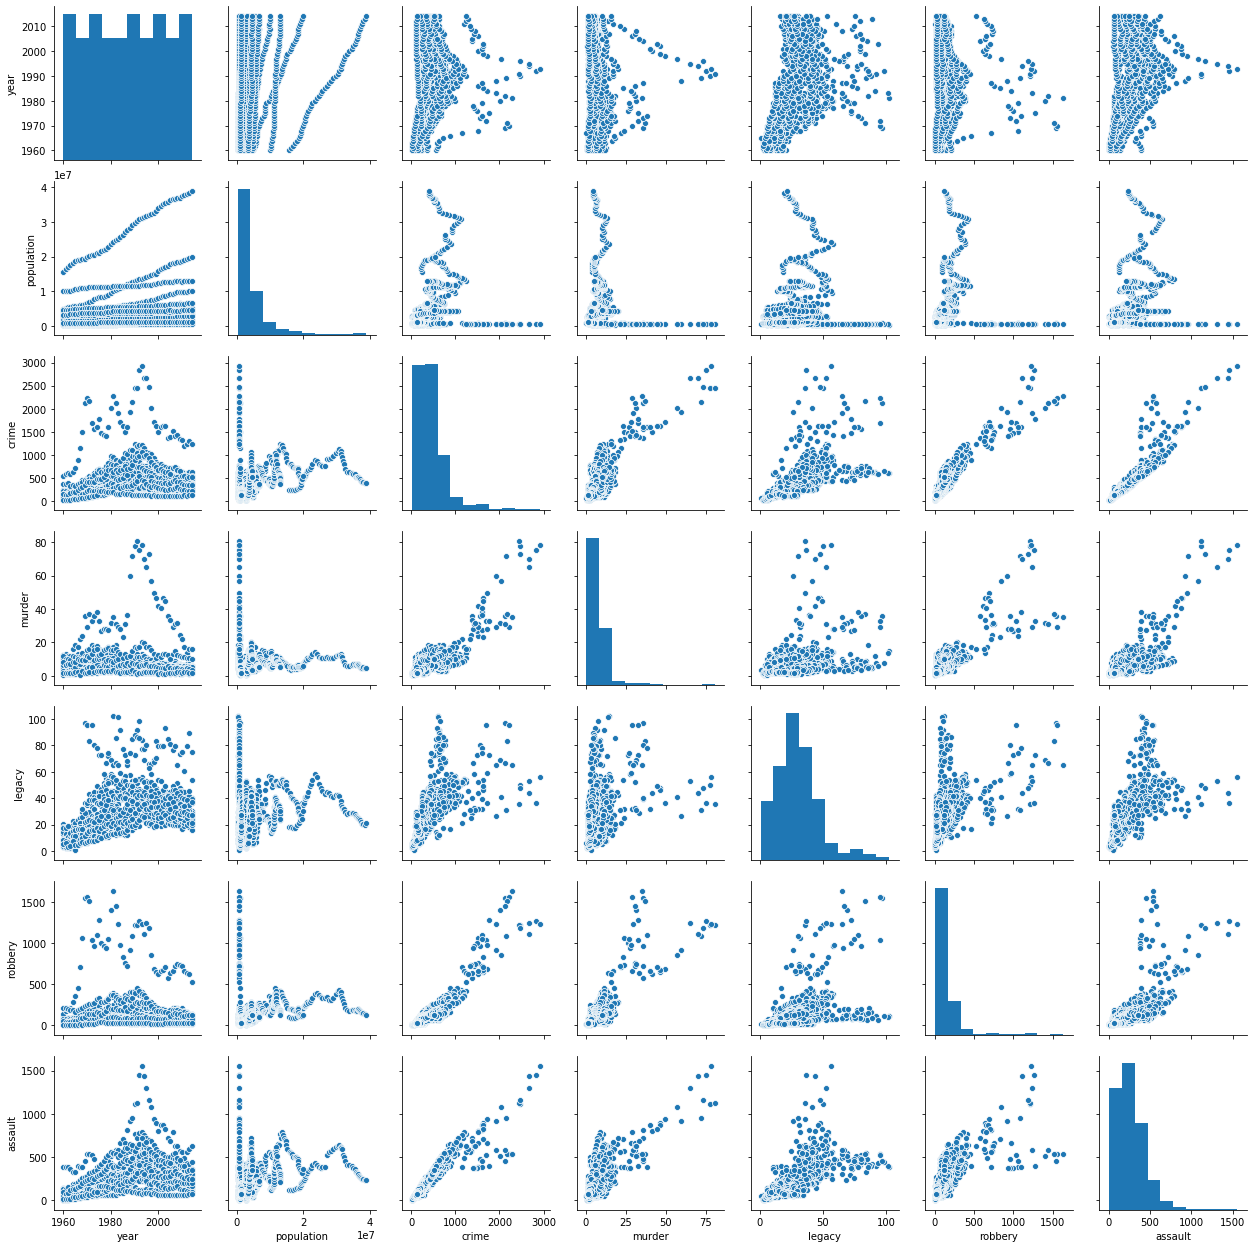

In [17]:
sns.pairplot(df2)

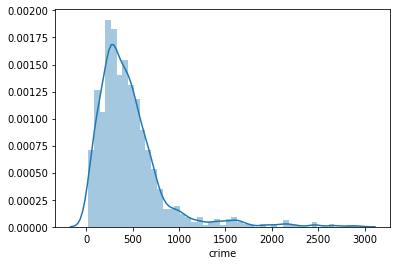

In [18]:
sns.distplot(df2['crime'])

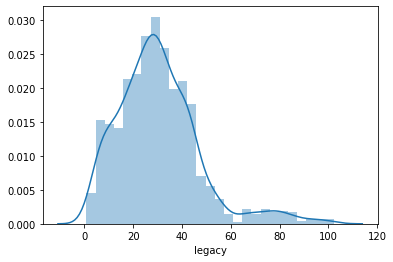

In [19]:
sns.distplot(df2['legacy'])

In [20]:
df2.corr()

,year,population,crime,murder,legacy,robbery,assault
year,1.000000,0.162081,0.233693,-0.046012,0.419630,0.058010,0.364693
population,0.162081,1.000000,0.163163,-0.026794,0.034636,0.104978,0.210721
crime,0.233693,0.163163,1.000000,0.832803,0.595266,0.920177,0.913959
murder,-0.046012,-0.026794,0.832803,1.000000,0.289764,0.816314,0.712643
legacy,0.419630,0.034636,0.595266,0.289764,1.000000,0.431932,0.618902
robbery,0.058010,0.104978,0.920177,0.816314,0.431932,1.000000,0.684104
assault,0.364693,0.210721,0.913959,0.712643,0.618902,0.684104,1.000000


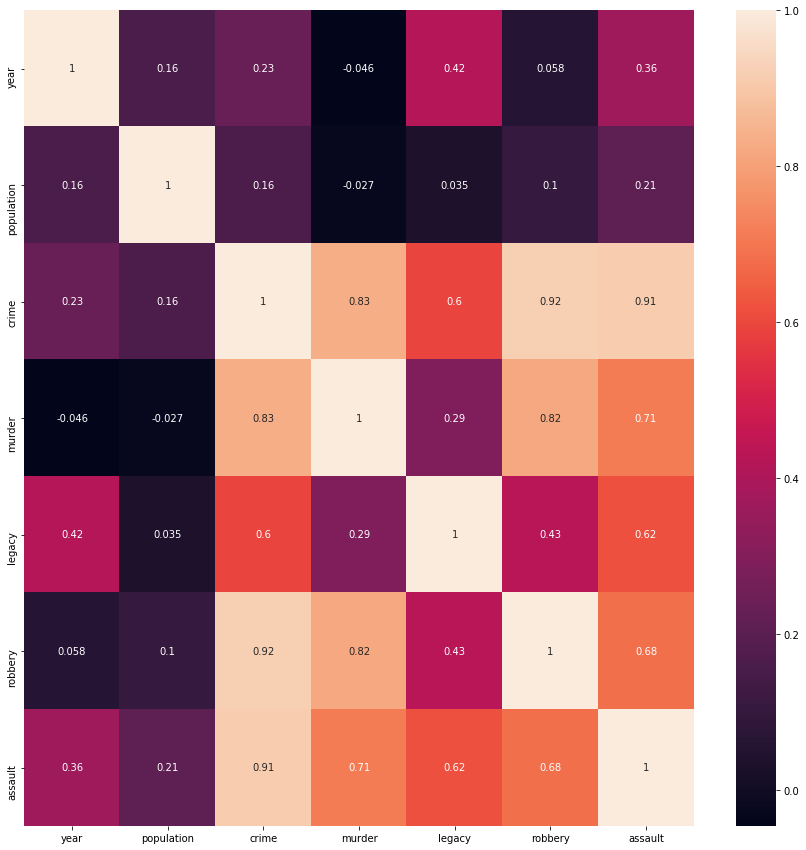

In [21]:
# It's hard to see the correlations with small graphs and long number strings, so 
#next I made a heatmap of the above correlations and annotated it for a better understanding

Var_Corr = df2.corr()
plt.figure(figsize = (15,15))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# 6- Scikit-learn Linear Regression 

First of all, we are going to use scikit-learn linear regression to train, test and predict the US violent crime.

In [59]:
#I assign columns to X and y and reshape. I have to reshape X and y to make them the same shape in order to make the pink and red graph further down this document
X = df2[ 'legacy']         
y = df2['crime']
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)


In [60]:
#Now we test, train, and split the chosen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [61]:
X_train.shape, y_train.shape

((660, 1), (660, 1))

In [62]:
X_test.shape, y_test.shape

((440, 1), (440, 1))

In [63]:
# Now import linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
# Next we fit the training data to a linear model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#Then we use the model to predict the result from the test data
y_predicted = lm.predict(X_test)

In [66]:
print(y_predicted)

[[ 587.03051426]
 [ 500.61794599]
 [ 421.50784828]
 [ 348.48314271]
 [ 313.18786835]
 [ 608.93792593]
 [ 537.13029878]
 [ 268.15596658]
 [ 600.41837695]
 [ 421.50784828]
 [ 376.47594651]
 [1117.67670811]
 [ 287.6292214 ]
 [ 339.96359373]
 [ 302.23416251]
 [ 636.93072973]
 [ 847.48529748]
 [ 214.60451582]
 [ 215.82159425]
 [ 554.16939675]
 [ 399.60043661]
 [ 605.28669065]
 [ 500.61794599]
 [ 613.80623963]
 [ 667.35769039]
 [ 342.39775058]
 [ 433.67863255]
 [ 377.69302494]
 [ 376.47594651]
 [ 145.23104552]
 [ 294.93169195]
 [ 397.16627976]
 [ 114.80408487]
 [ 501.83502442]
 [ 241.3802412 ]
 [ 662.48937668]
 [ 523.74243609]
 [1268.59443296]
 [ 260.85349602]
 [ 520.09120081]
 [ 992.3176302 ]
 [ 439.76402468]
 [ 190.26294729]
 [ 624.75994547]
 [1002.05425761]
 [1030.04706142]
 [ 448.28357366]
 [ 629.62825918]
 [ 381.34426022]
 [  95.33083005]
 [1072.64480634]
 [ 381.34426022]
 [ 154.96767293]
 [ 153.75059451]
 [ 116.02116329]
 [ 800.01923885]
 [ 130.62610441]
 [ 184.17755516]
 [ 148.8822808

In [67]:
# Use appropriate metric and interpret the meaning of the score.
from pandas import DataFrame
import statsmodels.api as sm
X = df2['legacy']         
y = df2['crime']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     602.6
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.98e-106
Time:                        18:51:04   Log-Likelihood:                -7835.5
No. Observations:                1100   AIC:                         1.567e+04
Df Residuals:                    1098   BIC:                         1.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.5701     18.574      3.530      0.0

C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# What does the output mean?

The model has the equation: crime = 13.12(legacy) + 65.57
    
The slope may be interpreted in the following: For each additional legacy per 100,000, there is a predicted increase of 13.12 crime.

The p-value is equal to 0.000 so they suggest the model is meaningful (statistically significant), but we also need to look at the Adjusted R-Squared value. It states that about 35.4% of the variation in the observations may be explained by the model. In other words, 64.6% of the variation in the data is likely not explained by this model.

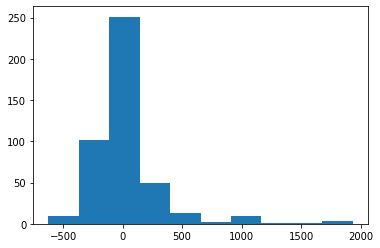

In [68]:
#Now let's check the histogram of the residuals 
#Residual= Observed-Predicted
Residual = (y_test - y_predicted)
plt1 = plt.hist(Residual)

In [69]:
# check a Gaussian distribution
# mean and standard deviation
mu, sigma = 0, 0.1 
Residual = np.random.normal(mu, sigma, 1000)

In [70]:
abs(mu - np.mean(Residual)) < 0.01

True

In [71]:
abs(sigma - np.std(Residual, ddof=1)) < 0.01

True

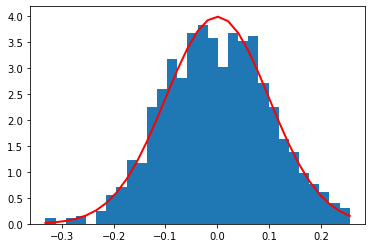

In [72]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(Residual, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()


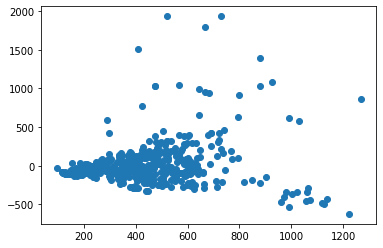

In [73]:
#scatterplot of predicted values and residuals 
plt.scatter(y_predicted, y_test - y_predicted)

<function matplotlib.pyplot.show(*args, **kw)>

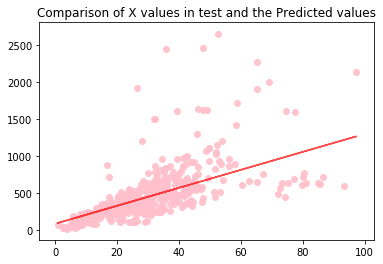

In [74]:
#check assumption of homoscedasticity
plt.title('Comparison of X values in test and the Predicted values')

plt.plot(X_test, y_predicted, color = 'red', alpha = 0.7)

plt.scatter(X_test, y_test, color = 'pink', alpha = 0.9)

plt.show

This assumption means that the variance around the regression line is the same for all values of the predictor variable (X)

The plot shows a violation of this assumption
    

# 7- What about more variables?

In [75]:
from pandas import DataFrame
import statsmodels.api as sm
X = df2[['murder', 'legacy', 'robbery', 'assault']]         
y = df2['crime']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.991e+06
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:51:10   Log-Likelihood:                -2579.6
No. Observations:                1100   AIC:                             5169.
Df Residuals:                    1095   BIC:                             5194.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1761      0.168      1.051      0.2

# What does the output mean?
The multiple regression model has the following equation: crime = 0.97(murder) + 1.01(legacy) + 0.99(robbery)+ 1.00(assault) + 0.18
    
The slope may be interpreted in the following: For each additional murder per 100,000, there is a predicted increase of 0.97 crime whether legacy, robbery, and assault are under control.

The p-values are equal at 0.000 so they suggest the model is meaningful (statistically significant), but we also need to look at the Adjusted R-Squared value. It states that about 100% of the variation in the observations may be explained by the model.


In [76]:
#I assign columns to X and y and reshape. I have to reshape X and y to make them the same shape in order to make the pink and red graph further down this document
X = df2[['murder','legacy','robbery', 'assault']]      
y = df2['crime']

In [77]:
#Now we test, train, and split the chosen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=9)

In [78]:
# Now import linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [79]:
# Next we fit the training data to a linear model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#Then we use the model to predict the result from the test data
y_predicted = lm.predict(X_test)

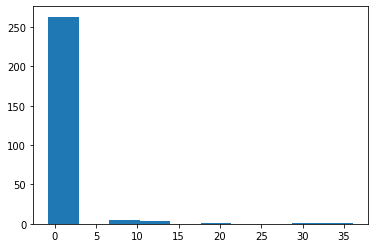

In [81]:
#Now let's check the histogram of the residuals 
#Residual= Observed-Predicted
Residual = (y_test - y_predicted)
plt1 = plt.hist(Residual)

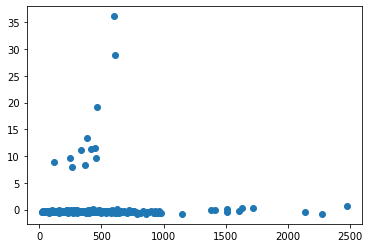

In [87]:
#scatterplot of predicted values and residuals 
plt.scatter(y_predicted, y_test - y_predicted)

In [82]:
# check a Gaussian distribution
# mean and standard deviation
mu, sigma = 0, 0.1 
Residual = np.random.normal(mu, sigma, 1000)

In [83]:
abs(mu - np.mean(Residual)) < 0.01

True

In [84]:
abs(sigma - np.std(Residual, ddof=1)) < 0.01

True

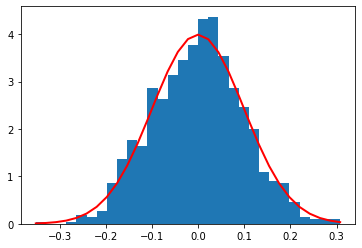

In [85]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(Residual, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()

# Conclusion

The simple linear regression model equation: crime = 13.12(legacy) + 65.57 explained only 35.4% of the variation in the observations despite the model was meaningful, whereas, the multiple regression model crime = 0.97(murder) + 1.01(legacy) + 0.99(robbery)+ 1.00(assault) + 0.18, which was statistically significant, explained 100% of the variation in the observations. There is a statistically significant with a strong relationship between a violent crime and murder, robbery and assault. Also, there is a quite bite correlation between the violent crime and legacy.
